In [1]:
import numpy as np
from scipy.interpolate import BSpline

In [2]:
k = 2
t = np.array([0, 1, 2, 3, 4, 5, 6], dtype = np.float64)
c = np.array([-1, 2, 0, -1, 2], dtype = np.float64)

def B_dp(
    x: np.ndarray, 
    t: np.ndarray, 
    c: np.ndarray, 
    k: int,
    extrapolate: bool = False
):
    Nt = t.shape[0]
    x_a = np.tile(x, reps = (Nt, 1))

    t_0 = np.expand_dims(t, axis = 1)
    t_1 = np.roll(t_0, shift = -1, axis = 0)

    t_k = t_0
    t_k1 = np.roll(t_0, shift = -1)

    t_extrapo = t_0
    if extrapolate:
        t_extrapo[0, 0] = float('-inf')
        t_extrapo[-1, 0] = float('inf')
    
    dp_0 = (
        (t_extrapo <= x) & \
        (x < np.roll(t_extrapo, shift = -1, axis = 0))
    ).astype(dtype = np.float64)

    for _ in range(k):
        # c1 part
        t_k = np.roll(t_k, shift = -1, axis = 0)
        c_1 = (x_a - t_0) / np.where(t_0 == t_k, float('inf'), t_k - t_0) * dp_0

        # c2 part
        t_k1  = np.roll(t_k1, shift = -1, axis = 0)
        c_2 = (t_k1 - x_a) / np.where(t_1 == t_k1, float('inf'), t_k1 - t_1) * np.roll(dp_0, shift = -1, axis = 0)

        dp_0 = c_1 + c_2

    return np.sum(np.expand_dims(c, axis = 1) * dp_0[:len(c), :], axis = 0)

/var/folders/h7/x72tq6xx3qv70h_4zhcvp1400000gn/T/ipykernel_68990/3799392661.py:34: RuntimeWarning: invalid value encountered in true_divide
  c_1 = (x_a - t_0) / np.where(t_0 == t_k, float('inf'), t_k - t_0) * dp_0


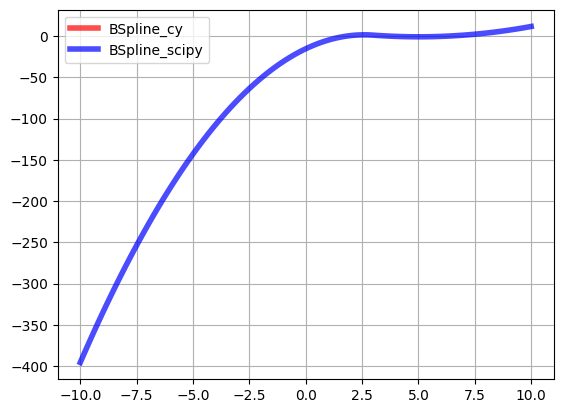

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = np.linspace(-10, 10, 100)
spl = BSpline(t, c, k, extrapolate = True)
ax.plot(x, B_dp(x, t, c, k, True), 'r-', lw = 4, alpha = 0.7, label = 'BSpline_cy')
ax.plot(x, spl(x), 'b-', lw = 4, alpha = 0.7, label = 'BSpline_scipy')
ax.grid(True)
ax.legend(loc = 'best')
plt.show()